# Week 7 assignments: Gene expression
#### Zelin Wei
5 Nov. 2020

## Clustering

In [1]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, leaves_list, dendrogram
import numpy as np
import matplotlib.pyplot as plt

### Load data, filter genes with low expression level, and log2-transform the data

In [2]:
allAnno = pd.read_csv('all_annotated.csv', sep = ',')
allAnno

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [3]:
adjdf = allAnno[allAnno.iloc[:, 2:].median(axis = 1) > 0]
adjdf.iloc[:, 2:] = np.log2(adjdf.iloc[:, 2:] + 0.1)
adjdf

/Users/zelinwei/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
8,FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
9,FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
10,FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
11,FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
34665,FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
34667,FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787
34684,FBtr0114261,CR41590,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053


### Cluster genes and samples respectively using `linkage`

Since the output of `leaves_list` is the numerical identifier of samples/genes, I store gene/sample names in `genenames` and `sampnames`.

In [4]:
genetree = linkage(adjdf.iloc[:, 2:], 'ward')
geneleaf = leaves_list(genetree)
genenames = [adjdf.iloc[i, 1] for i in geneleaf]
print(genetree)
print(geneleaf)

[[7.71000000e+02 7.72000000e+02 0.00000000e+00 2.00000000e+00]
 [7.73000000e+02 8.61300000e+03 0.00000000e+00 3.00000000e+00]
 [7.74000000e+02 8.61400000e+03 0.00000000e+00 4.00000000e+00]
 ...
 [1.72110000e+04 1.72190000e+04 3.80820414e+02 3.58500000e+03]
 [1.72200000e+04 1.72210000e+04 4.99982506e+02 5.02800000e+03]
 [1.72220000e+04 1.72230000e+04 1.09361749e+03 8.61300000e+03]]
[4283 5380  242 ... 1637 3555 7409]


In [5]:
samptree = linkage(adjdf.T.iloc[2:, :], 'ward')
sampleaf = leaves_list(samptree)
sampnames = [adjdf.columns[i+2] for i in sampleaf]
sampnames = ['t_name', 'gene_name'] + sampnames
print(samptree)
print(sampnames)

[[  2.          10.         148.80233244   2.        ]
 [  0.           8.         167.16634436   2.        ]
 [  4.          12.         176.9596102    2.        ]
 [ 16.          17.         198.76465596   4.        ]
 [  7.          15.         199.06693917   2.        ]
 [ 14.          20.         201.71533165   3.        ]
 [  6.          21.         206.6448765    4.        ]
 [  3.          11.         215.76455797   2.        ]
 [  5.          13.         225.02139065   2.        ]
 [  1.           9.         230.93512592   2.        ]
 [ 18.          23.         261.9085361    4.        ]
 [ 19.          25.         290.22228252   6.        ]
 [ 24.          26.         370.88720921   6.        ]
 [ 22.          28.         501.31853649  10.        ]
 [ 27.          29.         595.94062943  16.        ]]
['t_name', 'gene_name', 'male_12', 'female_12', 'male_10', 'female_10', 'male_11', 'female_11', 'male_14C', 'female_14C', 'male_14D', 'female_14D', 'male_14B', 'female_14B', 

### Drawing heatmap and dendrogram.

In [6]:
heatmapdf = adjdf.iloc[geneleaf, :]
heatmapdf = heatmapdf.loc[:, sampnames]
heatmapdf

,t_name,gene_name,male_12,female_12,male_10,female_10,male_11,female_11,male_14C,female_14C,male_14D,female_14D,male_14B,female_14B,male_14A,female_14A,male_13,female_13
16945,FBtr0088035,Ef1alpha48D,12.934721,12.686953,12.670183,12.722926,12.813750,12.867688,12.968766,13.162684,13.063854,13.033016,12.898895,12.985335,12.928335,12.983538,12.856987,12.944601
21487,FBtr0100231,RpL41,12.433014,12.414387,12.250214,12.211794,11.247904,11.888512,13.315899,12.670927,12.957029,13.035814,12.852893,12.443481,12.830904,12.911454,12.560846,12.979426
918,FBtr0081639,alphaTub84B,10.722029,10.333407,10.329504,10.526979,10.934465,10.737289,11.855659,11.754094,11.984685,11.652179,11.681140,11.661965,11.067607,11.193248,10.743815,10.840464
11518,FBtr0076032,RpL10Ab,10.795758,10.517779,10.417125,10.417446,10.493041,10.918809,11.800301,11.606854,11.672828,11.483158,11.906460,11.543012,11.390469,11.637179,10.674436,11.092437
7492,FBtr0089422,RpS7,10.786691,10.476903,10.385360,10.580815,10.947841,11.164172,11.484327,11.452426,11.483044,11.189940,11.826114,11.616858,11.239565,11.213128,10.646758,11.211013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6911,FBtr0085250,mino,4.676290,4.173244,4.368432,3.578029,3.734366,4.998784,-3.321928,0.459418,-3.321928,-3.321928,-3.321928,1.584866,1.022778,0.858330,2.414056,-3.321928
18077,FBtr0087363,CG11807,5.112638,1.759061,2.571355,3.288537,3.362584,4.735950,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,3.239246,4.323013,3.078899,5.398089,-3.321928
6358,FBtr0301469,LpR1,2.689639,2.323187,2.134276,3.084756,-3.321928,2.179521,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,2.819882,3.669078,1.169102,1.832952,-3.321928
14117,FBtr0078350,Aef1,3.914116,1.805650,1.946598,1.848539,1.025071,3.557844,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,0.060088,2.055140,1.146803,-0.130872,-3.321928


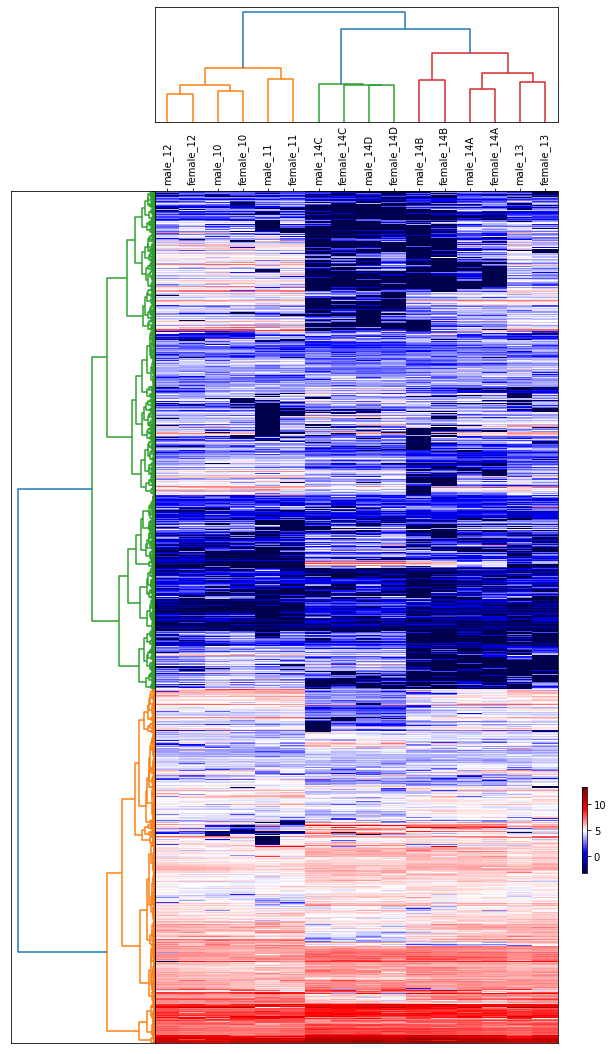

In [7]:
fig,ax = plt.subplots(figsize = (8, 16))
plt.axis('off')
ax1 = plt.axes([0.25, 0, 0.7, 0.74])
h = ax1.pcolor(heatmapdf.iloc[:, 2:], cmap = plt.cm.seismic)
ax1.set_xticks(np.arange(heatmapdf.shape[1]-2)+0.5)
ax1.set_xticklabels(sampnames[2:])
ax1.xaxis.tick_top()
ax1.set_yticks([])
plt.xticks(rotation = 90)
ax0 = plt.axes([0.95, 0, 0.05, 0.37])
ax0.set_yticks([])
ax0.set_xticks([])
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
fig.colorbar(h)
ax2 = plt.axes([0.25, 0.8, 0.7, 0.1])
ax2.set_xticks([])
ax2.set_yticks([])
ax2 = dendrogram(samptree, no_labels = True, orientation = 'top')
ax3 = plt.axes([0, 0, 0.25, 0.74])
ax3.set_xticks([])
ax3.set_yticks([])
ax3 = dendrogram(genetree, no_labels = True, orientation = 'left')
plt.savefig('DendroHeatmap')
plt.show()

Since there are too many genes, I hide gene names in the graph above, and print gene names below in the order from the bottom of the heatmap to the top.

In [8]:
print(genenames)

['Ef1alpha48D', 'RpL41', 'alphaTub84B', 'RpL10Ab', 'RpS7', 'RpL40', 'RpLP1', 'RpL19', 'RpS3', 'RpL37a', 'RpL3', 'RpS4', 'EF2', 'RpS16', 'RpS9', 'RpL14', 'RpS6', 'RpL6', 'RpS24', 'RpL13A', 'RpL23', 'RpL8', 'RpL26', 'RpLP2', 'betaTub56D', 'RpL18A', 'sta', 'RpS15', 'Hsc70-4', 'RpL31', 'RpS27A', 'RpS25', 'RpS20', 'RpS19a', 'RpL5', 'RpS3A', 'eIF-5A', 'RpL39', 'RpS28b', 'RpL23A', 'RpL32', 'RpS26', 'RpL35A', 'RpL7A', 'Rack1', 'RpL29', 'RpL22', 'RpL7', 'His2Av', 'RpS23', 'RpS5b', 'Act5C', 'RpLP0', 'RpL28', 'RpS7', 'RpS18', 'RpL18', 'RpS10b', 'RpL4', 'RpL17', 'RpS21', 'RpS12', 'RpL36', 'Df31', 'RpL21', 'RpS15Aa', 'tsr', 'RpL21', 'RpS13', 'RpS8', 'RpS18', 'RpL35', 'RpS30', 'FK506-bp2', 'RpL36A', 'RpL36A', 'eIF-4a', 'RpS30', 'RpS23', 'Tctp', 'Ef1gamma', 'RpL27', 'RpL27A', 'RpL27A', 'RpL27A', 'RpL37A', 'RpL7', 'RpL17', 'RpL13', 'RpL12', 'Rpt4', 'dUTPase', 'Fib', 'CG5941', 'Cisd2', 'AdSS', 'GstS1', 'snf', 'Prosbeta7', 'Snr1', 'CG1707', 'capt', 'Rab11', 'CG4390', 'CG3321', 'cl', 'GstO2', 'Prx3', 'Nx

## Differential expression

In [9]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf

### Add stage and sex information to the data frame.

In [10]:
lsdf = adjdf.T
lsdf.columns = lsdf.loc['gene_name', :]
lsdf = lsdf.loc['male_10':, :]
lsdf['stage'] = [10.0, 11.0, 12.0, 13.0, 14.0, 14.0, 14.0, 14.0, 10.0, 11.0, 12.0, 13.0, 14.0, 14.0, 14.0, 14.0]
lsdf['sex'] = ['male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female']
lsdf

gene_name,CR40182,Parp,Alg-2,Tim17b,Tim17b,CG41128,CG41099,CG41099,CG12581,CG12582,...,mt:ND3,mt:ND5,mt:ND4,mt:Cyt-b,mt:ND1,mt:lrRNA,CR41590,CR40679,stage,sex
male_10,4.57365,3.47212,4.26062,2.68161,6.89997,2.70509,4.75646,3.14647,-3.32193,3.46393,...,-3.32193,2.77647,3.49208,5.06356,4.6616,11.1919,-2.5348,1.07806,10.0,male
male_11,3.59309,-3.32193,-3.32193,2.01271,3.55226,-3.32193,-3.32193,-3.32193,-3.32193,4.23906,...,-3.32193,-1.47013,-1.02401,0.20933,-0.437467,5.09509,-3.32193,-3.32193,11.0,male
male_12,4.38319,-3.32193,3.90037,2.66547,6.90974,3.38764,-3.32193,4.65375,-3.32193,4.67025,...,-3.32193,3.67005,2.11786,3.31221,4.41827,9.8575,-2.34821,3.01688,12.0,male
male_13,3.77261,-3.32193,4.80188,6.13017,6.24561,4.52975,4.85263,4.09329,-3.32193,4.08372,...,-3.32193,5.76376,6.54958,8.69687,9.01452,12.2717,-2.30182,1.11383,13.0,male
male_14A,4.24048,3.89776,4.4848,6.07272,6.18816,4.65837,4.89247,2.50752,3.46578,4.07881,...,5.24796,5.72629,6.44864,6.6813,8.35056,11.1365,-3.32193,1.69674,14.0,male
male_14B,4.74968,-3.32193,2.9903,2.94598,6.95361,4.43548,-3.32193,-3.32193,4.83997,-3.32193,...,-3.32193,2.67673,4.50141,4.67518,5.77831,9.21394,-3.32193,-3.32193,14.0,male
male_14C,4.51853,4.14581,3.80107,6.23034,6.34579,5.11012,4.42178,-3.32193,6.83412,3.48419,...,5.11985,5.72382,6.19377,6.16692,8.49332,11.2838,-3.32193,0.695194,14.0,male
male_14D,3.5586,3.43687,3.70106,5.75061,5.90106,4.14388,2.42338,3.73393,7.22232,-3.32193,...,4.60372,3.96227,5.82369,6.94574,7.7975,10.6901,-2.1434,3.2158,14.0,male
female_10,4.45905,-3.32193,4.2227,5.48696,5.60232,3.8855,4.15723,3.63683,-3.32193,4.53384,...,2.24717,3.42726,5.37293,6.90534,8.25979,11.3326,0.00326833,3.76295,10.0,female
female_11,3.80963,-3.32193,1.59416,4.08186,4.1968,2.03595,-3.32193,-3.32193,-3.32193,3.09516,...,-3.32193,-0.163229,-1.37436,-0.371506,1.17224,6.26032,-3.32193,0.904145,11.0,female


Since some genes appear more than once in the data frame, I replace all gene names with 'gene' and a number for subsequent linear regression.

In [11]:
lsgenes = lsdf.columns
lsdf.columns = ['gene'+str(i) for i in range(8613)] + ['stage', 'sex']
lsdf.index = [i for i in range(16)]
lsdf

,gene0,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,...,gene8605,gene8606,gene8607,gene8608,gene8609,gene8610,gene8611,gene8612,stage,sex
0,4.57365,3.47212,4.26062,2.68161,6.89997,2.70509,4.75646,3.14647,-3.32193,3.46393,...,-3.32193,2.77647,3.49208,5.06356,4.6616,11.1919,-2.5348,1.07806,10.0,male
1,3.59309,-3.32193,-3.32193,2.01271,3.55226,-3.32193,-3.32193,-3.32193,-3.32193,4.23906,...,-3.32193,-1.47013,-1.02401,0.20933,-0.437467,5.09509,-3.32193,-3.32193,11.0,male
2,4.38319,-3.32193,3.90037,2.66547,6.90974,3.38764,-3.32193,4.65375,-3.32193,4.67025,...,-3.32193,3.67005,2.11786,3.31221,4.41827,9.8575,-2.34821,3.01688,12.0,male
3,3.77261,-3.32193,4.80188,6.13017,6.24561,4.52975,4.85263,4.09329,-3.32193,4.08372,...,-3.32193,5.76376,6.54958,8.69687,9.01452,12.2717,-2.30182,1.11383,13.0,male
4,4.24048,3.89776,4.4848,6.07272,6.18816,4.65837,4.89247,2.50752,3.46578,4.07881,...,5.24796,5.72629,6.44864,6.6813,8.35056,11.1365,-3.32193,1.69674,14.0,male
5,4.74968,-3.32193,2.9903,2.94598,6.95361,4.43548,-3.32193,-3.32193,4.83997,-3.32193,...,-3.32193,2.67673,4.50141,4.67518,5.77831,9.21394,-3.32193,-3.32193,14.0,male
6,4.51853,4.14581,3.80107,6.23034,6.34579,5.11012,4.42178,-3.32193,6.83412,3.48419,...,5.11985,5.72382,6.19377,6.16692,8.49332,11.2838,-3.32193,0.695194,14.0,male
7,3.5586,3.43687,3.70106,5.75061,5.90106,4.14388,2.42338,3.73393,7.22232,-3.32193,...,4.60372,3.96227,5.82369,6.94574,7.7975,10.6901,-2.1434,3.2158,14.0,male
8,4.45905,-3.32193,4.2227,5.48696,5.60232,3.8855,4.15723,3.63683,-3.32193,4.53384,...,2.24717,3.42726,5.37293,6.90534,8.25979,11.3326,0.00326833,3.76295,10.0,female
9,3.80963,-3.32193,1.59416,4.08186,4.1968,2.03595,-3.32193,-3.32193,-3.32193,3.09516,...,-3.32193,-0.163229,-1.37436,-0.371506,1.17224,6.26032,-3.32193,0.904145,11.0,female


### Linear regression without sex

In [12]:
p = []
coef = []
for i in range(8613):
    func = 'gene'+str(i)+' ~ stage'
    lsdf['gene'+str(i)] = [lsdf['gene'+str(i)][j] for j in range(16)]
    model = smf.ols(formula = func, data = lsdf)
    results = model.fit()
    p.append(results.pvalues[1])
    coef.append(results.params[1])

In [13]:
adjdf['p_nosex'] = p
adjdf['coef_nosex'] = coef
adjdf

/Users/zelinwei/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/zelinwei/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,p_nosex,coef_nosex
3,FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914,0.735893,0.026464
8,FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883,0.162378,0.880440
9,FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802,0.263080,0.388746
10,FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001,0.031521,0.542177
11,FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012,0.221445,0.201195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673,0.049018,0.820108
34665,FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730,0.051185,0.942403
34667,FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787,0.546605,0.231565
34684,FBtr0114261,CR41590,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053,0.170680,-0.212609


### QQ plot without controlling sex

In [14]:
nosexdf = adjdf.sort_values(by = 'p_nosex')
nosexdf['p_expected'] = (np.arange(8613)+1)/8613
nosexdf['-logp_nosex'] = -np.log10(nosexdf['p_nosex'])
nosexdf['-logp_expected'] = -np.log10(nosexdf['p_expected'])
nosexdf

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,...,female_13,female_14A,female_14B,female_14C,female_14D,p_nosex,coef_nosex,p_expected,-logp_nosex,-logp_expected
20646,FBtr0071924,Ppa,-2.683076,-0.832308,1.174226,2.946782,5.249243,5.949833,5.234184,5.442342,...,3.041501,5.447027,5.748959,5.736456,5.788178,8.260525e-15,2.183072,0.000116,14.082992,3.935154
20647,FBtr0330249,Ppa,-2.683076,-0.832308,1.174226,2.946782,5.249243,5.949833,5.234184,5.442342,...,3.041501,5.447027,5.748959,5.736456,5.788178,8.260525e-15,2.183072,0.000232,14.082992,3.634124
20645,FBtr0343014,Ppa,-2.757921,-1.010463,0.964879,2.730028,5.030037,5.730386,5.014984,5.223058,...,2.824551,5.227741,5.529569,5.517070,5.568777,1.454301e-14,2.150359,0.000348,13.837346,3.458033
31213,FBtr0080193,CG14915,-0.573671,2.517926,5.271851,6.672216,9.273713,10.707383,10.765094,9.936892,...,7.571202,8.974607,10.128719,10.616256,10.029714,1.047712e-11,2.852146,0.000464,10.979758,3.333094
8734,FBtr0072872,CG8960,2.622915,4.726886,6.577100,7.652086,8.635040,9.586184,9.550375,9.477485,...,8.205575,8.842453,9.884245,9.931557,9.278339,2.536184e-11,1.740305,0.000581,10.595819,3.236184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23593,FBtr0071095,RpS14a,6.996359,5.366751,7.246201,5.995301,8.084568,7.596964,8.229569,8.656007,...,5.595306,7.862595,8.733305,2.750894,2.061335,9.985308e-01,0.000630,0.999536,0.000639,0.000202
22297,FBtr0345315,CG2924,7.568373,6.156295,7.145531,7.802248,7.620958,5.233056,5.246150,5.496082,...,5.151283,7.416465,7.122243,7.384779,6.151041,9.987745e-01,-0.000434,0.999652,0.000533,0.000151
4086,FBtr0300247,CG7215,5.522254,-0.982674,5.845094,-1.750154,-1.196426,-1.135123,2.202453,2.352459,...,-1.327153,-1.199474,-1.129762,2.458673,5.908777,9.991114e-01,0.000579,0.999768,0.000386,0.000101
10098,FBtr0076886,RhoGEF4,1.711286,2.149031,1.205924,0.940677,1.715531,1.496304,2.646288,1.422892,...,2.133217,0.806648,3.042730,2.104039,1.148305,9.995359e-01,-0.000065,0.999884,0.000202,0.000050


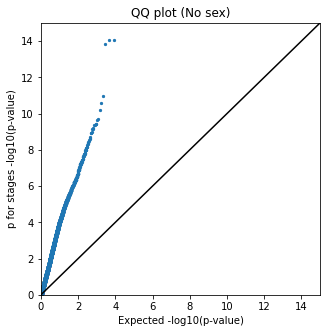

In [15]:
fig, ax = plt.subplots(figsize = (5, 5))
ax.scatter(nosexdf['-logp_expected'], nosexdf['-logp_nosex'], s = 5)
ax.plot([15, 0], [15, 0], color = "black")

plt.xlim([0, 15])
plt.ylim([0, 15])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("p for stages -log10(p-value)")
plt.title('QQ plot (No sex)')
plt.savefig('QQplotNosex')
    
plt.show()

### Select differentially expressing genes with FDR < 0.1

In [16]:
diff_genes_nosex = []
DiffgeneNosex = open('DiffgeneNosex.txt', 'w')
DiffgeneNosex.write('Differentially expressing gene list (without controlling sex):\n')
for i in range(8613):
    if nosexdf['p_nosex'][nosexdf.index[i]]*8613/(i+1) <= 0.1:
        diff_genes_nosex.append(nosexdf['gene_name'][nosexdf.index[i]])
        DiffgeneNosex.write(nosexdf['gene_name'][nosexdf.index[i]]+'\n')
    else:
        break
DiffgeneNosex.close()
diff_genes_nosex

['Ppa',
 'Ppa',
 'Ppa',
 'CG14915',
 'CG8960',
 'term',
 'CG7271',
 'CG34214',
 'Dtg',
 'CG6770',
 'twi',
 'twi',
 'hkb',
 'Nrt',
 'CG2129',
 'endos',
 'sala',
 'Ilp4',
 'CR45270',
 'D',
 'CG13427',
 'spri',
 'mira',
 'CG13454',
 'CR45270',
 'endos',
 'Bsg25D',
 'CG43725',
 'D',
 'link',
 'CG4164',
 'CR45270',
 'Tcp-1zeta',
 'Cys',
 'brk',
 'CG45099',
 'Jafrac1',
 'mip40',
 'CG8026',
 'Kr',
 'dhd',
 'CG45085',
 'CR44676',
 'Bx',
 'Kr',
 'CG17249',
 'GILT2',
 'CG6293',
 'CG5059',
 'GstD3',
 'spo',
 'CG8635',
 'spo',
 'CG10932',
 'CG1218',
 'Hsp26',
 'Hsp26',
 'CG14317',
 'cbt',
 'CG6180',
 'CG10932',
 'retn',
 'cN-IIIB',
 'Aats-tyr',
 'CG9953',
 'CG5569',
 'CG4440',
 'CG10035',
 'png',
 'Pmm45A',
 'lost',
 'aret',
 'CG14937',
 'CSN7',
 'mtrm',
 'CG6015',
 'CG8929',
 'CR43949',
 'GstO2',
 'CREG',
 'CG6293',
 'CG10035',
 'sna',
 'pont',
 'GlcT-1',
 'CG34224',
 'E(spl)m7-HLH',
 'CG42662',
 'croc',
 'mRpS29',
 'kin17',
 'CG5537',
 'btd',
 'Cpr60D',
 'CG15771',
 'Catsup',
 'hyx',
 'Dlc90F',


### Linear regression with sex as a covariate

In [17]:
p = []
coef = []
for i in range(8613):
    func = 'gene'+str(i)+' ~ stage+sex'
    model = smf.ols(formula = func, data = lsdf)
    results = model.fit()
    p.append(results.pvalues[2])
    coef.append(results.params[2])

In [18]:
adjdf['p_stage_sexcontrolled'] = p
adjdf['coef_stage_sexcontrolled'] = coef
adjdf

/Users/zelinwei/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/zelinwei/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,...,female_12,female_13,female_14A,female_14B,female_14C,female_14D,p_nosex,coef_nosex,p_stage_sexcontrolled,coef_stage_sexcontrolled
3,FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,...,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914,0.735893,0.026464,0.745479,0.026464
8,FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,...,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883,0.162378,0.880440,0.174987,0.880440
9,FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,...,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802,0.263080,0.388746,0.274123,0.388746
10,FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,...,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001,0.031521,0.542177,0.018751,0.542177
11,FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,...,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012,0.221445,0.201195,0.227350,0.201195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,...,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673,0.049018,0.820108,0.056993,0.820108
34665,FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,...,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730,0.051185,0.942403,0.057250,0.942403
34667,FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,...,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787,0.546605,0.231565,0.560402,0.231565
34684,FBtr0114261,CR41590,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,...,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053,0.170680,-0.212609,0.177894,-0.212609


### QQ plot with sex as a covariate

In [19]:
sexdf = adjdf.sort_values(by = 'p_stage_sexcontrolled')
sexdf['p_expected'] = (np.arange(8613)+1)/8613
sexdf['-logp_stage_sexcontrolled'] = -np.log10(sexdf['p_stage_sexcontrolled'])
sexdf['-logp_expected'] = -np.log10(sexdf['p_expected'])
sexdf

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,...,female_14B,female_14C,female_14D,p_nosex,coef_nosex,p_stage_sexcontrolled,coef_stage_sexcontrolled,p_expected,-logp_stage_sexcontrolled,-logp_expected
20646,FBtr0071924,Ppa,-2.683076,-0.832308,1.174226,2.946782,5.249243,5.949833,5.234184,5.442342,...,5.748959,5.736456,5.788178,8.260525e-15,2.183072,6.477941e-14,2.183072,0.000116,13.188563,3.935154
20647,FBtr0330249,Ppa,-2.683076,-0.832308,1.174226,2.946782,5.249243,5.949833,5.234184,5.442342,...,5.748959,5.736456,5.788178,8.260525e-15,2.183072,6.477941e-14,2.183072,0.000232,13.188563,3.634124
20645,FBtr0343014,Ppa,-2.757921,-1.010463,0.964879,2.730028,5.030037,5.730386,5.014984,5.223058,...,5.529569,5.517070,5.568777,1.454301e-14,2.150359,1.140239e-13,2.150359,0.000348,12.943004,3.458033
31213,FBtr0080193,CG14915,-0.573671,2.517926,5.271851,6.672216,9.273713,10.707383,10.765094,9.936892,...,10.128719,10.616256,10.029714,1.047712e-11,2.852146,2.904440e-11,2.852146,0.000464,10.536938,3.333094
8734,FBtr0072872,CG8960,2.622915,4.726886,6.577100,7.652086,8.635040,9.586184,9.550375,9.477485,...,9.884245,9.931557,9.278339,2.536184e-11,1.740305,1.323227e-10,1.740305,0.000581,9.878366,3.236184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23593,FBtr0071095,RpS14a,6.996359,5.366751,7.246201,5.995301,8.084568,7.596964,8.229569,8.656007,...,8.733305,2.750894,2.061335,9.985308e-01,0.000630,9.984889e-01,0.000630,0.999536,0.000657,0.000202
22297,FBtr0345315,CG2924,7.568373,6.156295,7.145531,7.802248,7.620958,5.233056,5.246150,5.496082,...,7.122243,7.384779,6.151041,9.987745e-01,-0.000434,9.988044e-01,-0.000434,0.999652,0.000520,0.000151
4086,FBtr0300247,CG7215,5.522254,-0.982674,5.845094,-1.750154,-1.196426,-1.135123,2.202453,2.352459,...,-1.129762,2.458673,5.908777,9.991114e-01,0.000579,9.991187e-01,0.000579,0.999768,0.000383,0.000101
10098,FBtr0076886,RhoGEF4,1.711286,2.149031,1.205924,0.940677,1.715531,1.496304,2.646288,1.422892,...,3.042730,2.104039,1.148305,9.995359e-01,-0.000065,9.995516e-01,-0.000065,0.999884,0.000195,0.000050


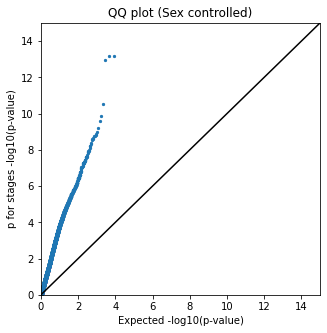

In [20]:
fig, ax = plt.subplots(figsize = (5, 5))
ax.scatter(sexdf['-logp_expected'], sexdf['-logp_stage_sexcontrolled'], s = 5)
ax.plot([15, 0], [15, 0], color = "black")

plt.xlim([0, 15])
plt.ylim([0, 15])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("p for stages -log10(p-value)")
plt.title('QQ plot (Sex controlled)')
plt.savefig('QQplotWithsex')
    
plt.show()

### Select differentially expressing genes with FDR < 0.1

In [21]:
diff_genes_sex = []
for i in range(8613):
    if sexdf['p_stage_sexcontrolled'][sexdf.index[i]]*8613/(i+1) <= 0.1:
        diff_genes_sex.append(sexdf['gene_name'][sexdf.index[i]])
    else:
        break

sexdf['color'] = ['red']*i + ['black']*(8613-i) #Set colors for volcano plot.
        
diff_genes_sex

['Ppa',
 'Ppa',
 'Ppa',
 'CG14915',
 'CG8960',
 'term',
 'CG7271',
 'CG34214',
 'CG6770',
 'Dtg',
 'twi',
 'twi',
 'Ilp4',
 'hkb',
 'CG2129',
 'Nrt',
 'endos',
 'sala',
 'CR45270',
 'CG13427',
 'D',
 'spri',
 'CR45270',
 'mira',
 'CG13454',
 'Bsg25D',
 'endos',
 'CG43725',
 'Tcp-1zeta',
 'CR45270',
 'link',
 'D',
 'CG6180',
 'CG4164',
 'Cys',
 'Kr',
 'brk',
 'CG45099',
 'CR44676',
 'Kr',
 'CG8026',
 'Jafrac1',
 'CG17249',
 'mip40',
 'dhd',
 'CG1218',
 'CG45085',
 'CG10932',
 'Bx',
 'GILT2',
 'CG5059',
 'CG6293',
 'CG10932',
 'CG10035',
 'Hsp26',
 'Hsp26',
 'CG8635',
 'GstD3',
 'CG14317',
 'spo',
 'spo',
 'retn',
 'cbt',
 'cN-IIIB',
 'Aats-tyr',
 'CG4440',
 'CG9953',
 'CG5569',
 'png',
 'Pmm45A',
 'CSN7',
 'lost',
 'aret',
 'CG14937',
 'mtrm',
 'CG8929',
 'CG10035',
 'CG6015',
 'CR43949',
 'GstO2',
 'CG15771',
 'pont',
 'sna',
 'CREG',
 'btd',
 'CG6293',
 'CG42662',
 'GlcT-1',
 'CG15771',
 'kin17',
 'E(spl)m7-HLH',
 'CG34224',
 'mRpS29',
 'Aldh',
 'gt',
 'croc',
 'CG5537',
 'Cpr60D',
 '

In [22]:
Noverlap = 0
for each in diff_genes_nosex:
    if each in diff_genes_sex:
        Noverlap += 1

print('Overlap percentage: ', Noverlap/len(diff_genes_nosex)*100, ' %')

Overlap percentage:  96.93931398416886  %


In [23]:
DiffgeneSex = open('DiffgeneSex.txt', 'w')
DiffgeneSex.write('Differentially expressing gene list (with sex as a covariate):\n')
DiffgeneSex.write('(96.94 % overlapping with no sex-controlling result)\n')
for each in diff_genes_sex:
    DiffgeneSex.write(each+'\n')
    
DiffgeneSex.close()

### Volcano plot

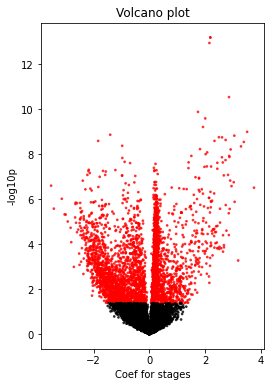

In [24]:
fig2, axnew = plt.subplots(figsize = (4, 6))
axnew.scatter(sexdf['coef_stage_sexcontrolled'], sexdf['-logp_stage_sexcontrolled'], c = sexdf['color'], alpha = 0.7, s = 3)

plt.ylabel('-log10p')
plt.xlabel('Coef for stages')
plt.title('Volcano plot')
plt.savefig('VolcanoPlot')
plt.show()